In [4]:
pip install numpy opencv-python matplotlib


Note: you may need to restart the kernel to use updated packages.


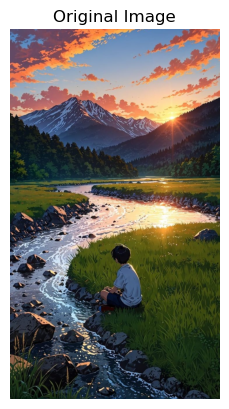

Original Image Size: 166566 bytes


In [18]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

# Load the image
image_path = 'clusterPic.jpeg'  # Replace with your image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Display the original image
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Calculate the original size
original_size = os.path.getsize(image_path)
print(f'Original Image Size: {original_size} bytes')

# Reshape the image to be a list of pixels
pixels = image.reshape(-1, 3)


In [26]:
# Number of colors (clusters)
num_clusters = 16  # You can adjust the number of clusters

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(pixels)

# Replace each pixel value with its cluster center
compressed_pixels = kmeans.cluster_centers_[kmeans.labels_]
compressed_pixels = np.clip(compressed_pixels.astype('uint8'), 0, 255)

# Reshape the pixels back to the original image dimension
compressed_image = compressed_pixels.reshape(image.shape)



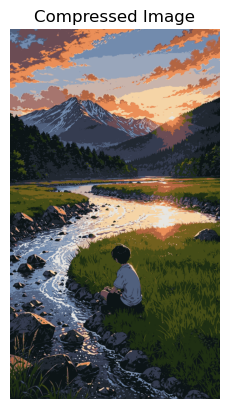

Compressed Image Size: 442518 bytes
Compression Ratio: 0.38


In [27]:
# Display the compressed image
plt.imshow(compressed_image)
plt.title('Compressed Image')
plt.axis('off')
plt.show()

# Save the compressed image
compressed_image_bgr = cv2.cvtColor(compressed_image, cv2.COLOR_RGB2BGR)
cv2.imwrite('compressed_image.jpg', compressed_image_bgr)

compressed_image_path = 'compressed_image.jpg'

# Calculate the compressed size
compressed_size = os.path.getsize(compressed_image_path)
print(f'Compressed Image Size: {compressed_size} bytes')

# Calculate and display the compression ratio
compression_ratio = original_size / compressed_size
print(f'Compression Ratio: {compression_ratio:.2f}')
